In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [2]:
#Distribución a-priori:
Prior =  np.array([0.2,0.8])
States = np.array([0,1])

In [23]:
#Matriz de Transición:
T=np.array([[0.8,0.2],[0.2,0.8]])
#Matriz de Emisión:
E=np.array([[0.5,0.9],[0.5,0.1]])

DictH = {0:"Justa",1:"Sesgada"}
DictO = {0:"Cara",1:"Sello"}

#Situación que se observo
Obs = np.array([1,0,0,0,1,0,1,0])

a) Use la siguiente distribución de probabilidad a-priori $\pi = [0.2, 0.8]$ para la moneda
justa y sesgada.


In [26]:
#Método Estados Ocultos
def GetHiddenStates(States,N):
    CStates=list( combinations_with_replacement(States,N))
    
    Permutation=[]
    
    for it in CStates:
        
        P = list(permutations(it,N))
        
        for i in P:
            
            if(i not in Permutation):
                
                Permutation.append(i)
                
    print(CStates)
    
    return np.array(Permutation)

In [27]:
#Estados Ocultos
HiddenStates = GetHiddenStates(States,8)
HiddenStates

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [30]:
#Método Calculo Probabilidad de Estados
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    
    P = 1.
    
    P *= Prior[State[0]]
    
    for i in range(n-1):
        
        P *= T[State[i+1],State[i]]
    
    for i in range(n):
        
        P *= E[Obs[i],State[i]]
    
    print(P,State)
    
    return P

b) Encuentre la secuencia oculta más probable del tipo de moneda que se eligió en cada lanzamiento y su respectiva probabilidad $\mathbb{P}_i$.

In [31]:
d = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(d):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
print(P)

0.00016384000000000008 [0 0 0 0 0 0 0 0]
7.372800000000004e-05 [0 0 0 0 0 0 0 1]
2.048000000000001e-06 [0 0 0 0 0 0 1 0]
1.843200000000001e-05 [0 0 0 0 0 1 0 0]
2.048000000000001e-06 [0 0 0 0 1 0 0 0]
1.843200000000001e-05 [0 0 0 1 0 0 0 0]
1.843200000000001e-05 [0 0 1 0 0 0 0 0]
1.843200000000001e-05 [0 1 0 0 0 0 0 0]
3.2768000000000016e-05 [1 0 0 0 0 0 0 0]
1.4745600000000007e-05 [0 0 0 0 0 0 1 1]
8.294400000000005e-06 [0 0 0 0 0 1 0 1]
3.686400000000002e-06 [0 0 0 0 0 1 1 0]
9.216000000000004e-07 [0 0 0 0 1 0 0 1]
2.5600000000000014e-08 [0 0 0 0 1 0 1 0]
3.6864000000000017e-06 [0 0 0 0 1 1 0 0]
8.294400000000005e-06 [0 0 0 1 0 0 0 1]
2.3040000000000013e-07 [0 0 0 1 0 0 1 0]
2.073600000000001e-06 [0 0 0 1 0 1 0 0]
3.686400000000002e-06 [0 0 0 1 1 0 0 0]
8.294400000000005e-06 [0 0 1 0 0 0 0 1]
2.3040000000000013e-07 [0 0 1 0 0 0 1 0]
2.073600000000001e-06 [0 0 1 0 0 1 0 0]
2.3040000000000013e-07 [0 0 1 0 1 0 0 0]
3.317760000000002e-05 [0 0 1 1 0 0 0 0]
8.294400000000005e-06 [0 1 0 0 0

In [32]:
pMax = P.max()
iMax = np.where(P==pMax)[0]
stateMax = HiddenStates[iMax]
print(stateMax,pMax)

[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


In [11]:
sumP=np.sum(P)
sumP

0.0019344381513984013

Text(0.5, 1.0, 'Probabilidad para cada Estado Oculto')

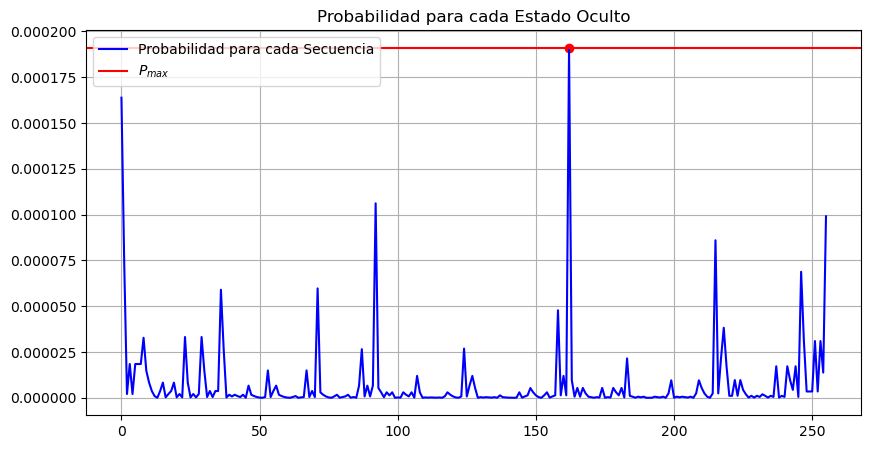

In [37]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()
ax.plot(P,color ='b',label = "Probabilidad para cada Secuencia")
ax.axhline(y = pMax,color = "RED",label = "$P_{max}$")
ax.scatter(iMax,pMax,color = "RED")
ax.grid(axis = 'both')
ax.legend()
plt.title("Probabilidad para cada Estado Oculto")

C) Calcule las probabilidades de cada estado observable (o) como la suma de las
probabilidades de todos los estados ocultos, $\mathbb{P}_0$ = $\sum_{i}\mathbb{P}_i$.
.

In [38]:
ObsStates = GetHiddenStates(States,8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [39]:
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    d = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

0.00016384000000000008 [0 0 0 0 0 0 0 0]
7.372800000000004e-05 [0 0 0 0 0 0 0 1]
1.843200000000001e-05 [0 0 0 0 0 0 1 0]
1.843200000000001e-05 [0 0 0 0 0 1 0 0]
1.843200000000001e-05 [0 0 0 0 1 0 0 0]
1.843200000000001e-05 [0 0 0 1 0 0 0 0]
1.843200000000001e-05 [0 0 1 0 0 0 0 0]
1.843200000000001e-05 [0 1 0 0 0 0 0 0]
0.00029491200000000015 [1 0 0 0 0 0 0 0]
0.00013271040000000008 [0 0 0 0 0 0 1 1]
8.294400000000005e-06 [0 0 0 0 0 1 0 1]
3.317760000000002e-05 [0 0 0 0 0 1 1 0]
8.294400000000005e-06 [0 0 0 0 1 0 0 1]
2.073600000000001e-06 [0 0 0 0 1 0 1 0]
3.317760000000002e-05 [0 0 0 0 1 1 0 0]
8.294400000000005e-06 [0 0 0 1 0 0 0 1]
2.073600000000001e-06 [0 0 0 1 0 0 1 0]
2.073600000000001e-06 [0 0 0 1 0 1 0 0]
3.317760000000002e-05 [0 0 0 1 1 0 0 0]
8.294400000000005e-06 [0 0 1 0 0 0 0 1]
2.073600000000001e-06 [0 0 1 0 0 0 1 0]
2.073600000000001e-06 [0 0 1 0 0 1 0 0]
2.073600000000001e-06 [0 0 1 0 1 0 0 0]
3.317760000000002e-05 [0 0 1 1 0 0 0 0]
8.294400000000005e-06 [0 1 0 0 0 0 0 

7.464960000000005e-07 [0 1 0 1 1 1 0 0]
2.985984000000002e-06 [0 1 1 0 0 0 1 1]
1.8662400000000012e-07 [0 1 1 0 0 1 0 1]
8.294400000000006e-08 [0 1 1 0 0 1 1 0]
1.679616000000001e-06 [0 1 1 0 1 0 0 1]
4.665600000000003e-08 [0 1 1 0 1 0 1 0]
7.464960000000005e-07 [0 1 1 0 1 1 0 0]
2.6873856000000017e-05 [0 1 1 1 0 0 0 1]
7.464960000000005e-07 [0 1 1 1 0 0 1 0]
7.464960000000005e-07 [0 1 1 1 0 1 0 0]
0.00010749542400000007 [0 1 1 1 1 0 0 0]
5.308416000000003e-06 [1 0 0 0 0 1 1 1]
2.985984000000002e-06 [1 0 0 0 1 0 1 1]
2.985984000000002e-06 [1 0 0 0 1 1 0 1]
1.327104000000001e-06 [1 0 0 0 1 1 1 0]
2.985984000000002e-06 [1 0 0 1 0 0 1 1]
1.8662400000000012e-07 [1 0 0 1 0 1 0 1]
8.294400000000006e-08 [1 0 0 1 0 1 1 0]
2.6873856000000017e-05 [1 0 0 1 1 0 0 1]
7.464960000000005e-07 [1 0 0 1 1 0 1 0]
1.1943936000000008e-05 [1 0 0 1 1 1 0 0]
2.985984000000002e-06 [1 0 1 0 0 0 1 1]
1.8662400000000012e-07 [1 0 1 0 0 1 0 1]
8.294400000000006e-08 [1 0 1 0 0 1 1 0]
1.679616000000001e-06 [1 0 1 0 1 

1.3271040000000007e-06 [0 0 0 1 1 1 1 0]
2.6873856000000017e-05 [0 0 1 0 0 1 1 1]
1.8662400000000012e-07 [0 0 1 0 1 0 1 1]
1.8662400000000012e-07 [0 0 1 0 1 1 0 1]
7.464960000000005e-07 [0 0 1 0 1 1 1 0]
2.985984000000002e-06 [0 0 1 1 0 0 1 1]
1.8662400000000012e-07 [0 0 1 1 0 1 0 1]
7.464960000000005e-07 [0 0 1 1 0 1 1 0]
3.317760000000002e-07 [0 0 1 1 1 0 0 1]
8.294400000000004e-08 [0 0 1 1 1 0 1 0]
1.3271040000000007e-06 [0 0 1 1 1 1 0 0]
2.6873856000000017e-05 [0 1 0 0 0 1 1 1]
1.8662400000000012e-07 [0 1 0 0 1 0 1 1]
1.8662400000000012e-07 [0 1 0 0 1 1 0 1]
7.464960000000005e-07 [0 1 0 0 1 1 1 0]
1.8662400000000012e-07 [0 1 0 1 0 0 1 1]
1.1664000000000008e-08 [0 1 0 1 0 1 0 1]
4.665600000000003e-08 [0 1 0 1 0 1 1 0]
2.073600000000001e-08 [0 1 0 1 1 0 0 1]
5.184000000000003e-09 [0 1 0 1 1 0 1 0]
8.294400000000004e-08 [0 1 0 1 1 1 0 0]
2.6873856000000017e-05 [0 1 1 0 0 0 1 1]
1.679616000000001e-06 [0 1 1 0 0 1 0 1]
6.718464000000004e-06 [0 1 1 0 0 1 1 0]
1.8662400000000012e-07 [0 1 

5.9719680000000036e-05 [1 0 0 0 1 1 0 0]
1.658880000000001e-06 [1 0 0 1 0 0 0 1]
3.7324800000000023e-06 [1 0 0 1 0 0 1 0]
3.7324800000000023e-06 [1 0 0 1 0 1 0 0]
5.9719680000000036e-05 [1 0 0 1 1 0 0 0]
1.658880000000001e-06 [1 0 1 0 0 0 0 1]
3.7324800000000023e-06 [1 0 1 0 0 0 1 0]
3.7324800000000023e-06 [1 0 1 0 0 1 0 0]
3.7324800000000023e-06 [1 0 1 0 1 0 0 0]
5.9719680000000036e-05 [1 0 1 1 0 0 0 0]
2.9491200000000017e-06 [1 1 0 0 0 0 0 1]
6.635520000000004e-06 [1 1 0 0 0 0 1 0]
6.635520000000004e-06 [1 1 0 0 0 1 0 0]
6.635520000000004e-06 [1 1 0 0 1 0 0 0]
6.635520000000004e-06 [1 1 0 1 0 0 0 0]
0.00010616832000000007 [1 1 1 0 0 0 0 0]
4.777574400000003e-05 [0 0 0 0 1 1 1 1]
2.985984000000002e-06 [0 0 0 1 0 1 1 1]
2.985984000000002e-06 [0 0 0 1 1 0 1 1]
2.985984000000002e-06 [0 0 0 1 1 1 0 1]
0.00010749542400000007 [0 0 0 1 1 1 1 0]
2.985984000000002e-06 [0 0 1 0 0 1 1 1]
1.8662400000000012e-07 [0 0 1 0 1 0 1 1]
1.8662400000000012e-07 [0 0 1 0 1 1 0 1]
6.718464000000004e-06 [0 0 

2.9859840000000015e-06 [0 1 0 0 0 1 1 1]
1.866240000000001e-07 [0 1 0 0 1 0 1 1]
1.866240000000001e-07 [0 1 0 0 1 1 0 1]
7.464960000000004e-07 [0 1 0 0 1 1 1 0]
1.866240000000001e-07 [0 1 0 1 0 0 1 1]
1.1664000000000006e-08 [0 1 0 1 0 1 0 1]
4.6656000000000024e-08 [0 1 0 1 0 1 1 0]
1.866240000000001e-07 [0 1 0 1 1 0 0 1]
4.6656000000000024e-08 [0 1 0 1 1 0 1 0]
7.464960000000004e-07 [0 1 0 1 1 1 0 0]
3.317760000000002e-07 [0 1 1 0 0 0 1 1]
2.073600000000001e-08 [0 1 1 0 0 1 0 1]
8.294400000000004e-08 [0 1 1 0 0 1 1 0]
2.073600000000001e-08 [0 1 1 0 1 0 0 1]
5.184000000000003e-09 [0 1 1 0 1 0 1 0]
8.294400000000004e-08 [0 1 1 0 1 1 0 0]
3.317760000000002e-07 [0 1 1 1 0 0 0 1]
8.294400000000004e-08 [0 1 1 1 0 0 1 0]
8.294400000000004e-08 [0 1 1 1 0 1 0 0]
1.3271040000000007e-06 [0 1 1 1 1 0 0 0]
0.00042998169600000027 [1 0 0 0 0 1 1 1]
2.6873856000000017e-05 [1 0 0 0 1 0 1 1]
2.6873856000000017e-05 [1 0 0 0 1 1 0 1]
0.00010749542400000007 [1 0 0 0 1 1 1 0]
2.6873856000000017e-05 [1 0 0 1

1.1943936000000006e-05 [1 0 0 1 1 1 0 0]
3.317760000000002e-07 [1 0 1 0 0 0 1 1]
2.073600000000001e-08 [1 0 1 0 0 1 0 1]
8.294400000000004e-08 [1 0 1 0 0 1 1 0]
2.073600000000001e-08 [1 0 1 0 1 0 0 1]
5.184000000000003e-09 [1 0 1 0 1 0 1 0]
8.294400000000004e-08 [1 0 1 0 1 1 0 0]
3.317760000000002e-07 [1 0 1 1 0 0 0 1]
8.294400000000004e-08 [1 0 1 1 0 0 1 0]
8.294400000000004e-08 [1 0 1 1 0 1 0 0]
1.3271040000000007e-06 [1 0 1 1 1 0 0 0]
4.7775744000000025e-05 [1 1 0 0 0 0 1 1]
2.9859840000000015e-06 [1 1 0 0 0 1 0 1]
1.1943936000000006e-05 [1 1 0 0 0 1 1 0]
2.9859840000000015e-06 [1 1 0 0 1 0 0 1]
7.464960000000004e-07 [1 1 0 0 1 0 1 0]
1.1943936000000006e-05 [1 1 0 0 1 1 0 0]
2.9859840000000015e-06 [1 1 0 1 0 0 0 1]
7.464960000000004e-07 [1 1 0 1 0 0 1 0]
7.464960000000004e-07 [1 1 0 1 0 1 0 0]
1.1943936000000006e-05 [1 1 0 1 1 0 0 0]
5.308416000000003e-06 [1 1 1 0 0 0 0 1]
1.3271040000000007e-06 [1 1 1 0 0 0 1 0]
1.3271040000000007e-06 [1 1 1 0 0 1 0 0]
1.3271040000000007e-06 [1 1 1

8.294400000000006e-08 [1 0 0 1 0 1 1 0]
3.3177600000000023e-07 [1 0 0 1 1 0 0 1]
8.294400000000006e-08 [1 0 0 1 1 0 1 0]
1.1943936000000008e-05 [1 0 0 1 1 1 0 0]
3.3177600000000023e-07 [1 0 1 0 0 0 1 1]
1.8662400000000012e-07 [1 0 1 0 0 1 0 1]
7.464960000000005e-07 [1 0 1 0 0 1 1 0]
1.8662400000000012e-07 [1 0 1 0 1 0 0 1]
4.665600000000003e-08 [1 0 1 0 1 0 1 0]
6.718464000000004e-06 [1 0 1 0 1 1 0 0]
3.3177600000000023e-07 [1 0 1 1 0 0 0 1]
8.294400000000006e-08 [1 0 1 1 0 0 1 0]
7.464960000000005e-07 [1 0 1 1 0 1 0 0]
1.1943936000000008e-05 [1 0 1 1 1 0 0 0]
5.308416000000004e-06 [1 1 0 0 0 0 1 1]
2.985984000000002e-06 [1 1 0 0 0 1 0 1]
1.1943936000000008e-05 [1 1 0 0 0 1 1 0]
2.985984000000002e-06 [1 1 0 0 1 0 0 1]
7.464960000000005e-07 [1 1 0 0 1 0 1 0]
0.00010749542400000007 [1 1 0 0 1 1 0 0]
3.3177600000000023e-07 [1 1 0 1 0 0 0 1]
8.294400000000006e-08 [1 1 0 1 0 0 1 0]
7.464960000000005e-07 [1 1 0 1 0 1 0 0]
1.1943936000000008e-05 [1 1 0 1 1 0 0 0]
4.777574400000003e-05 [1 1 1 

5.971968000000004e-07 [1 0 0 1 0 1 1 1]
5.971968000000004e-07 [1 0 0 1 1 0 1 1]
5.374771200000004e-06 [1 0 0 1 1 1 0 1]
2.1499084800000015e-05 [1 0 0 1 1 1 1 0]
6.635520000000005e-08 [1 0 1 0 0 1 1 1]
4.147200000000003e-09 [1 0 1 0 1 0 1 1]
3.732480000000003e-08 [1 0 1 0 1 1 0 1]
1.492992000000001e-07 [1 0 1 0 1 1 1 0]
6.635520000000005e-08 [1 0 1 1 0 0 1 1]
3.732480000000003e-08 [1 0 1 1 0 1 0 1]
1.492992000000001e-07 [1 0 1 1 0 1 1 0]
5.971968000000004e-07 [1 0 1 1 1 0 0 1]
1.492992000000001e-07 [1 0 1 1 1 0 1 0]
2.1499084800000015e-05 [1 0 1 1 1 1 0 0]
9.555148800000007e-06 [1 1 0 0 0 1 1 1]
5.971968000000004e-07 [1 1 0 0 1 0 1 1]
5.374771200000004e-06 [1 1 0 0 1 1 0 1]
2.1499084800000015e-05 [1 1 0 0 1 1 1 0]
5.971968000000004e-07 [1 1 0 1 0 0 1 1]
3.3592320000000023e-07 [1 1 0 1 0 1 0 1]
1.343692800000001e-06 [1 1 0 1 0 1 1 0]
5.374771200000004e-06 [1 1 0 1 1 0 0 1]
1.343692800000001e-06 [1 1 0 1 1 0 1 0]
0.0001934917632000001 [1 1 0 1 1 1 0 0]
1.0616832000000008e-06 [1 1 1 0 0 0 

7.464960000000005e-07 [1 0 0 1 1 0 1 0]
1.1943936000000008e-05 [1 0 0 1 1 1 0 0]
3.3177600000000023e-07 [1 0 1 0 0 0 1 1]
2.0736000000000014e-08 [1 0 1 0 0 1 0 1]
7.464960000000005e-07 [1 0 1 0 0 1 1 0]
2.0736000000000014e-08 [1 0 1 0 1 0 0 1]
4.665600000000003e-08 [1 0 1 0 1 0 1 0]
7.464960000000005e-07 [1 0 1 0 1 1 0 0]
3.6864000000000025e-08 [1 0 1 1 0 0 0 1]
8.294400000000004e-08 [1 0 1 1 0 0 1 0]
8.294400000000004e-08 [1 0 1 1 0 1 0 0]
1.3271040000000007e-06 [1 0 1 1 1 0 0 0]
4.777574400000003e-05 [1 1 0 0 0 0 1 1]
2.985984000000002e-06 [1 1 0 0 0 1 0 1]
0.00010749542400000007 [1 1 0 0 0 1 1 0]
2.985984000000002e-06 [1 1 0 0 1 0 0 1]
6.718464000000004e-06 [1 1 0 0 1 0 1 0]
0.00010749542400000007 [1 1 0 0 1 1 0 0]
3.3177600000000023e-07 [1 1 0 1 0 0 0 1]
7.464960000000005e-07 [1 1 0 1 0 0 1 0]
7.464960000000005e-07 [1 1 0 1 0 1 0 0]
1.1943936000000008e-05 [1 1 0 1 1 0 0 0]
5.308416000000004e-06 [1 1 1 0 0 0 0 1]
1.1943936000000008e-05 [1 1 1 0 0 0 1 0]
1.1943936000000008e-05 [1 1 1

1.658880000000001e-06 [1 0 0 0 0 1 0 1]
5.9719680000000036e-05 [1 0 0 0 0 1 1 0]
1.843200000000001e-07 [1 0 0 0 1 0 0 1]
4.1472000000000026e-07 [1 0 0 0 1 0 1 0]
6.635520000000004e-06 [1 0 0 0 1 1 0 0]
1.658880000000001e-06 [1 0 0 1 0 0 0 1]
3.7324800000000023e-06 [1 0 0 1 0 0 1 0]
3.7324800000000023e-06 [1 0 0 1 0 1 0 0]
6.635520000000004e-06 [1 0 0 1 1 0 0 0]
1.658880000000001e-06 [1 0 1 0 0 0 0 1]
3.7324800000000023e-06 [1 0 1 0 0 0 1 0]
3.7324800000000023e-06 [1 0 1 0 0 1 0 0]
4.1472000000000026e-07 [1 0 1 0 1 0 0 0]
5.9719680000000036e-05 [1 0 1 1 0 0 0 0]
2.9491200000000017e-06 [1 1 0 0 0 0 0 1]
6.635520000000004e-06 [1 1 0 0 0 0 1 0]
6.635520000000004e-06 [1 1 0 0 0 1 0 0]
7.372800000000004e-07 [1 1 0 0 1 0 0 0]
6.635520000000004e-06 [1 1 0 1 0 0 0 0]
0.00010616832000000007 [1 1 1 0 0 0 0 0]
5.308416000000003e-06 [0 0 0 0 1 1 1 1]
2.985984000000002e-06 [0 0 0 1 0 1 1 1]
3.3177600000000023e-07 [0 0 0 1 1 0 1 1]
3.3177600000000023e-07 [0 0 0 1 1 1 0 1]
1.1943936000000008e-05 [0 0 

4.777574400000003e-07 [1 1 0 1 1 1 1 0]
1.7199267840000012e-05 [1 1 1 0 0 1 1 1]
9.674588160000007e-06 [1 1 1 0 1 0 1 1]
1.0749542400000007e-06 [1 1 1 0 1 1 0 1]
4.299816960000003e-06 [1 1 1 0 1 1 1 0]
1.7199267840000012e-05 [1 1 1 1 0 0 1 1]
1.194393600000001e-07 [1 1 1 1 0 1 0 1]
4.777574400000004e-07 [1 1 1 1 0 1 1 0]
1.7199267840000012e-05 [1 1 1 1 1 0 0 1]
4.299816960000003e-06 [1 1 1 1 1 0 1 0]
7.644119040000007e-06 [1 1 1 1 1 1 0 0]
3.439853568000002e-06 [0 1 1 1 1 1 1 1]
3.0958682112000025e-05 [1 0 1 1 1 1 1 1]
3.439853568000002e-06 [1 1 0 1 1 1 1 1]
3.0958682112000025e-05 [1 1 1 0 1 1 1 1]
3.439853568000003e-06 [1 1 1 1 0 1 1 1]
3.0958682112000025e-05 [1 1 1 1 1 0 1 1]
3.439853568000003e-06 [1 1 1 1 1 1 0 1]
1.3759414272000012e-05 [1 1 1 1 1 1 1 0]
9.906778275840008e-05 [1 1 1 1 1 1 1 1]
0.00016384000000000008 [0 0 0 0 0 0 0 0]
7.372800000000004e-05 [0 0 0 0 0 0 0 1]
1.843200000000001e-05 [0 0 0 0 0 0 1 0]
1.843200000000001e-05 [0 0 0 0 0 1 0 0]
2.048000000000001e-06 [0 0 0 0 

9.674588160000007e-06 [1 0 1 0 1 1 1 1]
1.0749542400000005e-06 [1 0 1 1 0 1 1 1]
1.0749542400000005e-06 [1 0 1 1 1 0 1 1]
1.0749542400000005e-06 [1 0 1 1 1 1 0 1]
4.299816960000002e-06 [1 0 1 1 1 1 1 0]
0.0001547934105600001 [1 1 0 0 1 1 1 1]
1.0749542400000005e-06 [1 1 0 1 0 1 1 1]
1.0749542400000005e-06 [1 1 0 1 1 0 1 1]
1.0749542400000005e-06 [1 1 0 1 1 1 0 1]
4.299816960000002e-06 [1 1 0 1 1 1 1 0]
1.719926784000001e-05 [1 1 1 0 0 1 1 1]
1.0749542400000005e-06 [1 1 1 0 1 0 1 1]
1.0749542400000005e-06 [1 1 1 0 1 1 0 1]
4.299816960000002e-06 [1 1 1 0 1 1 1 0]
1.9110297600000017e-06 [1 1 1 1 0 0 1 1]
1.194393600000001e-07 [1 1 1 1 0 1 0 1]
4.777574400000004e-07 [1 1 1 1 0 1 1 0]
1.9110297600000017e-06 [1 1 1 1 1 0 0 1]
4.777574400000004e-07 [1 1 1 1 1 0 1 0]
7.644119040000007e-06 [1 1 1 1 1 1 0 0]
3.439853568000003e-06 [0 1 1 1 1 1 1 1]
3.095868211200002e-05 [1 0 1 1 1 1 1 1]
3.095868211200002e-05 [1 1 0 1 1 1 1 1]
3.095868211200002e-05 [1 1 1 0 1 1 1 1]
3.439853568000003e-06 [1 1 1 1

9.216000000000006e-09 [1 0 0 1 0 1 1 0]
3.317760000000002e-07 [1 0 0 1 1 0 0 1]
9.216000000000006e-09 [1 0 0 1 1 0 1 0]
1.3271040000000007e-06 [1 0 0 1 1 1 0 0]
3.317760000000002e-07 [1 0 1 0 0 0 1 1]
1.866240000000001e-07 [1 0 1 0 0 1 0 1]
8.294400000000004e-08 [1 0 1 0 0 1 1 0]
1.866240000000001e-07 [1 0 1 0 1 0 0 1]
5.184000000000003e-09 [1 0 1 0 1 0 1 0]
7.464960000000004e-07 [1 0 1 0 1 1 0 0]
3.317760000000002e-07 [1 0 1 1 0 0 0 1]
9.216000000000006e-09 [1 0 1 1 0 0 1 0]
8.294400000000004e-08 [1 0 1 1 0 1 0 0]
1.3271040000000007e-06 [1 0 1 1 1 0 0 0]
5.308416000000003e-06 [1 1 0 0 0 0 1 1]
2.9859840000000015e-06 [1 1 0 0 0 1 0 1]
1.3271040000000007e-06 [1 1 0 0 0 1 1 0]
2.9859840000000015e-06 [1 1 0 0 1 0 0 1]
8.294400000000004e-08 [1 1 0 0 1 0 1 0]
1.1943936000000006e-05 [1 1 0 0 1 1 0 0]
3.317760000000002e-07 [1 1 0 1 0 0 0 1]
9.216000000000006e-09 [1 1 0 1 0 0 1 0]
8.294400000000004e-08 [1 1 0 1 0 1 0 0]
1.3271040000000007e-06 [1 1 0 1 1 0 0 0]
4.7775744000000025e-05 [1 1 1 0 0

5.971968000000003e-07 [0 0 1 1 0 1 1 1]
5.971968000000003e-07 [0 0 1 1 1 0 1 1]
5.374771200000003e-06 [0 0 1 1 1 1 0 1]
2.3887872000000013e-06 [0 0 1 1 1 1 1 0]
5.374771200000004e-06 [0 1 0 0 1 1 1 1]
3.3592320000000023e-07 [0 1 0 1 0 1 1 1]
3.3592320000000023e-07 [0 1 0 1 1 0 1 1]
3.0233088000000018e-06 [0 1 0 1 1 1 0 1]
1.343692800000001e-06 [0 1 0 1 1 1 1 0]
5.971968000000004e-07 [0 1 1 0 0 1 1 1]
3.732480000000003e-08 [0 1 1 0 1 0 1 1]
3.3592320000000023e-07 [0 1 1 0 1 1 0 1]
1.492992000000001e-07 [0 1 1 0 1 1 1 0]
5.971968000000004e-07 [0 1 1 1 0 0 1 1]
3.3592320000000023e-07 [0 1 1 1 0 1 0 1]
1.492992000000001e-07 [0 1 1 1 0 1 1 0]
5.374771200000004e-06 [0 1 1 1 1 0 0 1]
1.492992000000001e-07 [0 1 1 1 1 0 1 0]
2.1499084800000015e-05 [0 1 1 1 1 1 0 0]
9.555148800000005e-06 [1 0 0 0 1 1 1 1]
5.971968000000003e-07 [1 0 0 1 0 1 1 1]
5.971968000000003e-07 [1 0 0 1 1 0 1 1]
5.374771200000003e-06 [1 0 0 1 1 1 0 1]
2.3887872000000013e-06 [1 0 0 1 1 1 1 0]
6.635520000000005e-08 [1 0 1 0 0

1.3271040000000007e-06 [1 0 0 1 1 1 0 0]
2.9859840000000015e-06 [1 0 1 0 0 0 1 1]
1.866240000000001e-07 [1 0 1 0 0 1 0 1]
7.464960000000004e-07 [1 0 1 0 0 1 1 0]
2.073600000000001e-08 [1 0 1 0 1 0 0 1]
5.184000000000003e-09 [1 0 1 0 1 0 1 0]
8.294400000000004e-08 [1 0 1 0 1 1 0 0]
2.9859840000000015e-06 [1 0 1 1 0 0 0 1]
7.464960000000004e-07 [1 0 1 1 0 0 1 0]
7.464960000000004e-07 [1 0 1 1 0 1 0 0]
1.3271040000000007e-06 [1 0 1 1 1 0 0 0]
5.308416000000003e-06 [1 1 0 0 0 0 1 1]
3.317760000000002e-07 [1 1 0 0 0 1 0 1]
1.3271040000000007e-06 [1 1 0 0 0 1 1 0]
3.6864000000000025e-08 [1 1 0 0 1 0 0 1]
9.216000000000006e-09 [1 1 0 0 1 0 1 0]
1.474560000000001e-07 [1 1 0 0 1 1 0 0]
3.317760000000002e-07 [1 1 0 1 0 0 0 1]
8.294400000000004e-08 [1 1 0 1 0 0 1 0]
8.294400000000004e-08 [1 1 0 1 0 1 0 0]
1.474560000000001e-07 [1 1 0 1 1 0 0 0]
5.308416000000003e-06 [1 1 1 0 0 0 0 1]
1.3271040000000007e-06 [1 1 1 0 0 0 1 0]
1.3271040000000007e-06 [1 1 1 0 0 1 0 0]
1.474560000000001e-07 [1 1 1 0 1

1.658880000000001e-06 [0 1 0 0 0 0 1 1]
1.0368000000000007e-07 [0 1 0 0 0 1 0 1]
4.6080000000000026e-08 [0 1 0 0 0 1 1 0]
1.0368000000000007e-07 [0 1 0 0 1 0 0 1]
2.8800000000000016e-09 [0 1 0 0 1 0 1 0]
4.6080000000000026e-08 [0 1 0 0 1 1 0 0]
1.0368000000000007e-07 [0 1 0 1 0 0 0 1]
2.8800000000000016e-09 [0 1 0 1 0 0 1 0]
2.8800000000000016e-09 [0 1 0 1 0 1 0 0]
4.6080000000000026e-08 [0 1 0 1 1 0 0 0]
1.4929920000000009e-05 [0 1 1 0 0 0 0 1]
4.1472000000000026e-07 [0 1 1 0 0 0 1 0]
4.1472000000000026e-07 [0 1 1 0 0 1 0 0]
4.1472000000000026e-07 [0 1 1 0 1 0 0 0]
6.635520000000004e-06 [0 1 1 1 0 0 0 0]
2.6542080000000017e-05 [1 0 0 0 0 0 1 1]
1.658880000000001e-06 [1 0 0 0 0 1 0 1]
7.372800000000004e-07 [1 0 0 0 0 1 1 0]
1.658880000000001e-06 [1 0 0 0 1 0 0 1]
4.6080000000000026e-08 [1 0 0 0 1 0 1 0]
7.372800000000004e-07 [1 0 0 0 1 1 0 0]
1.658880000000001e-06 [1 0 0 1 0 0 0 1]
4.6080000000000026e-08 [1 0 0 1 0 0 1 0]
4.6080000000000026e-08 [1 0 0 1 0 1 0 0]
7.372800000000004e-07 [

3.732480000000003e-08 [1 0 1 0 1 1 0 1]
1.6588800000000013e-08 [1 0 1 0 1 1 1 0]
6.635520000000005e-08 [1 0 1 1 0 0 1 1]
4.147200000000003e-09 [1 0 1 1 0 1 0 1]
1.8432000000000012e-09 [1 0 1 1 0 1 1 0]
5.971968000000003e-07 [1 0 1 1 1 0 0 1]
1.658880000000001e-08 [1 0 1 1 1 0 1 0]
2.6542080000000015e-07 [1 0 1 1 1 1 0 0]
9.555148800000007e-06 [1 1 0 0 0 1 1 1]
5.374771200000004e-06 [1 1 0 0 1 0 1 1]
5.374771200000004e-06 [1 1 0 0 1 1 0 1]
2.3887872000000017e-06 [1 1 0 0 1 1 1 0]
5.971968000000004e-07 [1 1 0 1 0 0 1 1]
3.732480000000003e-08 [1 1 0 1 0 1 0 1]
1.6588800000000013e-08 [1 1 0 1 0 1 1 0]
5.374771200000004e-06 [1 1 0 1 1 0 0 1]
1.492992000000001e-07 [1 1 0 1 1 0 1 0]
2.3887872000000017e-06 [1 1 0 1 1 1 0 0]
9.555148800000007e-06 [1 1 1 0 0 0 1 1]
5.971968000000004e-07 [1 1 1 0 0 1 0 1]
2.654208000000002e-07 [1 1 1 0 0 1 1 0]
5.374771200000004e-06 [1 1 1 0 1 0 0 1]
1.492992000000001e-07 [1 1 1 0 1 0 1 0]
2.3887872000000017e-06 [1 1 1 0 1 1 0 0]
9.555148800000007e-06 [1 1 1 1 0 

2.6542080000000015e-07 [0 1 1 1 1 1 0 0]
1.0616832000000006e-06 [1 0 0 0 1 1 1 1]
5.971968000000004e-07 [1 0 0 1 0 1 1 1]
5.971968000000004e-07 [1 0 0 1 1 0 1 1]
6.635520000000005e-08 [1 0 0 1 1 1 0 1]
2.3887872000000017e-06 [1 0 0 1 1 1 1 0]
5.971968000000004e-07 [1 0 1 0 0 1 1 1]
3.732480000000003e-08 [1 0 1 0 1 0 1 1]
4.147200000000003e-09 [1 0 1 0 1 1 0 1]
1.492992000000001e-07 [1 0 1 0 1 1 1 0]
5.374771200000004e-06 [1 0 1 1 0 0 1 1]
3.732480000000003e-08 [1 0 1 1 0 1 0 1]
1.343692800000001e-06 [1 0 1 1 0 1 1 0]
5.971968000000004e-07 [1 0 1 1 1 0 0 1]
1.343692800000001e-06 [1 0 1 1 1 0 1 0]
2.3887872000000017e-06 [1 0 1 1 1 1 0 0]
1.0616832000000006e-06 [1 1 0 0 0 1 1 1]
6.635520000000004e-08 [1 1 0 0 1 0 1 1]
7.372800000000005e-09 [1 1 0 0 1 1 0 1]
2.654208000000002e-07 [1 1 0 0 1 1 1 0]
5.971968000000004e-07 [1 1 0 1 0 0 1 1]
4.147200000000003e-09 [1 1 0 1 0 1 0 1]
1.492992000000001e-07 [1 1 0 1 0 1 1 0]
6.635520000000005e-08 [1 1 0 1 1 0 0 1]
1.492992000000001e-07 [1 1 0 1 1 0 

1.194393600000001e-07 [1 1 1 1 0 1 0 1]
4.777574400000004e-07 [1 1 1 1 0 1 1 0]
1.9110297600000017e-06 [1 1 1 1 1 0 0 1]
4.777574400000004e-07 [1 1 1 1 1 0 1 0]
8.493465600000007e-07 [1 1 1 1 1 1 0 0]
3.822059520000003e-07 [0 1 1 1 1 1 1 1]
3.439853568000003e-06 [1 0 1 1 1 1 1 1]
3.822059520000003e-07 [1 1 0 1 1 1 1 1]
3.439853568000003e-06 [1 1 1 0 1 1 1 1]
3.439853568000003e-06 [1 1 1 1 0 1 1 1]
3.439853568000003e-06 [1 1 1 1 1 0 1 1]
3.8220595200000033e-07 [1 1 1 1 1 1 0 1]
1.5288238080000013e-06 [1 1 1 1 1 1 1 0]
1.100753141760001e-05 [1 1 1 1 1 1 1 1]
0.00016384000000000008 [0 0 0 0 0 0 0 0]
8.192000000000004e-06 [0 0 0 0 0 0 0 1]
2.048000000000001e-06 [0 0 0 0 0 0 1 0]
1.843200000000001e-05 [0 0 0 0 0 1 0 0]
1.843200000000001e-05 [0 0 0 0 1 0 0 0]
1.843200000000001e-05 [0 0 0 1 0 0 0 0]
2.048000000000001e-06 [0 0 1 0 0 0 0 0]
2.048000000000001e-06 [0 1 0 0 0 0 0 0]
0.00029491200000000015 [1 0 0 0 0 0 0 0]
1.638400000000001e-06 [0 0 0 0 0 0 1 1]
9.216000000000005e-07 [0 0 0 0 0 1 

1.4929920000000008e-07 [1 1 0 1 1 0 1 0]
2.3887872000000013e-06 [1 1 0 1 1 1 0 0]
1.0616832000000006e-06 [1 1 1 0 0 0 1 1]
6.635520000000004e-08 [1 1 1 0 0 1 0 1]
2.3887872000000013e-06 [1 1 1 0 0 1 1 0]
6.635520000000004e-08 [1 1 1 0 1 0 0 1]
1.4929920000000008e-07 [1 1 1 0 1 0 1 0]
2.3887872000000013e-06 [1 1 1 0 1 1 0 0]
1.1796480000000008e-07 [1 1 1 1 0 0 0 1]
2.654208000000002e-07 [1 1 1 1 0 0 1 0]
2.654208000000002e-07 [1 1 1 1 0 1 0 0]
4.246732800000003e-06 [1 1 1 1 1 0 0 0]
1.9110297600000012e-06 [0 0 1 1 1 1 1 1]
1.1943936000000008e-07 [0 1 0 1 1 1 1 1]
1.1943936000000008e-07 [0 1 1 0 1 1 1 1]
1.3271040000000011e-08 [0 1 1 1 0 1 1 1]
1.3271040000000011e-08 [0 1 1 1 1 0 1 1]
1.3271040000000011e-08 [0 1 1 1 1 1 0 1]
4.777574400000004e-07 [0 1 1 1 1 1 1 0]
1.7199267840000012e-05 [1 0 0 1 1 1 1 1]
1.0749542400000007e-06 [1 0 1 0 1 1 1 1]
1.1943936000000008e-07 [1 0 1 1 0 1 1 1]
1.1943936000000008e-07 [1 0 1 1 1 0 1 1]
1.1943936000000008e-07 [1 0 1 1 1 1 0 1]
4.299816960000002e-06 

4.1472000000000026e-07 [0 1 1 0 1 0 0 0]
5.9719680000000036e-05 [0 1 1 1 0 0 0 0]
2.9491200000000017e-06 [1 0 0 0 0 0 1 1]
1.843200000000001e-07 [1 0 0 0 0 1 0 1]
8.192000000000005e-08 [1 0 0 0 0 1 1 0]
1.843200000000001e-07 [1 0 0 0 1 0 0 1]
5.120000000000003e-09 [1 0 0 0 1 0 1 0]
8.192000000000005e-08 [1 0 0 0 1 1 0 0]
1.6588800000000008e-06 [1 0 0 1 0 0 0 1]
4.6080000000000026e-08 [1 0 0 1 0 0 1 0]
4.6080000000000026e-08 [1 0 0 1 0 1 0 0]
7.372800000000004e-07 [1 0 0 1 1 0 0 0]
1.6588800000000008e-06 [1 0 1 0 0 0 0 1]
4.6080000000000026e-08 [1 0 1 0 0 0 1 0]
4.6080000000000026e-08 [1 0 1 0 0 1 0 0]
4.6080000000000026e-08 [1 0 1 0 1 0 0 0]
6.635520000000003e-06 [1 0 1 1 0 0 0 0]
2.6542080000000013e-05 [1 1 0 0 0 0 0 1]
7.372800000000004e-07 [1 1 0 0 0 0 1 0]
7.372800000000004e-07 [1 1 0 0 0 1 0 0]
7.372800000000004e-07 [1 1 0 0 1 0 0 0]
6.635520000000003e-06 [1 1 0 1 0 0 0 0]
0.00010616832000000005 [1 1 1 0 0 0 0 0]
5.898240000000004e-07 [0 0 0 0 1 1 1 1]
3.317760000000002e-07 [0 0 0

8.493465600000005e-07 [1 1 1 1 1 1 0 0]
3.439853568000003e-06 [0 1 1 1 1 1 1 1]
3.822059520000003e-07 [1 0 1 1 1 1 1 1]
3.822059520000003e-07 [1 1 0 1 1 1 1 1]
3.439853568000002e-06 [1 1 1 0 1 1 1 1]
3.439853568000002e-06 [1 1 1 1 0 1 1 1]
3.439853568000002e-06 [1 1 1 1 1 0 1 1]
3.822059520000002e-07 [1 1 1 1 1 1 0 1]
1.528823808000001e-06 [1 1 1 1 1 1 1 0]
1.1007531417600007e-05 [1 1 1 1 1 1 1 1]
0.00016384000000000008 [0 0 0 0 0 0 0 0]
8.192000000000004e-06 [0 0 0 0 0 0 0 1]
2.048000000000001e-06 [0 0 0 0 0 0 1 0]
1.843200000000001e-05 [0 0 0 0 0 1 0 0]
1.843200000000001e-05 [0 0 0 0 1 0 0 0]
1.843200000000001e-05 [0 0 0 1 0 0 0 0]
2.048000000000001e-06 [0 0 1 0 0 0 0 0]
1.843200000000001e-05 [0 1 0 0 0 0 0 0]
3.2768000000000016e-05 [1 0 0 0 0 0 0 0]
1.638400000000001e-06 [0 0 0 0 0 0 1 1]
9.216000000000005e-07 [0 0 0 0 0 1 0 1]
3.686400000000002e-06 [0 0 0 0 0 1 1 0]
9.216000000000005e-07 [0 0 0 0 1 0 0 1]
2.3040000000000013e-07 [0 0 0 0 1 0 1 0]
3.317760000000002e-05 [0 0 0 0 1 1 0

2.654208000000002e-07 [1 1 1 1 0 1 0 0]
4.246732800000003e-06 [1 1 1 1 1 0 0 0]
1.9110297600000012e-06 [0 0 1 1 1 1 1 1]
1.0749542400000007e-06 [0 1 0 1 1 1 1 1]
1.0749542400000007e-06 [0 1 1 0 1 1 1 1]
1.1943936000000008e-07 [0 1 1 1 0 1 1 1]
1.1943936000000008e-07 [0 1 1 1 1 0 1 1]
1.1943936000000008e-07 [0 1 1 1 1 1 0 1]
4.299816960000002e-06 [0 1 1 1 1 1 1 0]
1.9110297600000012e-06 [1 0 0 1 1 1 1 1]
1.1943936000000008e-07 [1 0 1 0 1 1 1 1]
1.3271040000000011e-08 [1 0 1 1 0 1 1 1]
1.3271040000000011e-08 [1 0 1 1 1 0 1 1]
1.3271040000000011e-08 [1 0 1 1 1 1 0 1]
4.777574400000004e-07 [1 0 1 1 1 1 1 0]
1.719926784000001e-05 [1 1 0 0 1 1 1 1]
1.1943936000000008e-07 [1 1 0 1 0 1 1 1]
1.1943936000000008e-07 [1 1 0 1 1 0 1 1]
1.1943936000000008e-07 [1 1 0 1 1 1 0 1]
4.299816960000002e-06 [1 1 0 1 1 1 1 0]
1.9110297600000012e-06 [1 1 1 0 0 1 1 1]
1.1943936000000008e-07 [1 1 1 0 1 0 1 1]
1.1943936000000008e-07 [1 1 1 0 1 1 0 1]
4.299816960000002e-06 [1 1 1 0 1 1 1 0]
2.1233664000000018e-07 

3.317760000000002e-07 [1 0 1 1 0 0 0 1]
7.464960000000004e-07 [1 0 1 1 0 0 1 0]
7.464960000000004e-07 [1 0 1 1 0 1 0 0]
1.3271040000000007e-06 [1 0 1 1 1 0 0 0]
5.898240000000004e-07 [1 1 0 0 0 0 1 1]
3.6864000000000025e-08 [1 1 0 0 0 1 0 1]
1.3271040000000007e-06 [1 1 0 0 0 1 1 0]
4.096000000000002e-09 [1 1 0 0 1 0 0 1]
9.216000000000006e-09 [1 1 0 0 1 0 1 0]
1.474560000000001e-07 [1 1 0 0 1 1 0 0]
3.6864000000000025e-08 [1 1 0 1 0 0 0 1]
8.294400000000004e-08 [1 1 0 1 0 0 1 0]
8.294400000000004e-08 [1 1 0 1 0 1 0 0]
1.474560000000001e-07 [1 1 0 1 1 0 0 0]
5.898240000000004e-07 [1 1 1 0 0 0 0 1]
1.3271040000000007e-06 [1 1 1 0 0 0 1 0]
1.3271040000000007e-06 [1 1 1 0 0 1 0 0]
1.474560000000001e-07 [1 1 1 0 1 0 0 0]
2.123366400000001e-05 [1 1 1 1 0 0 0 0]
9.555148800000007e-06 [0 0 0 1 1 1 1 1]
5.971968000000004e-07 [0 0 1 0 1 1 1 1]
5.374771200000004e-06 [0 0 1 1 0 1 1 1]
5.971968000000004e-07 [0 0 1 1 1 0 1 1]
5.971968000000004e-07 [0 0 1 1 1 1 0 1]
2.1499084800000015e-05 [0 0 1 1 1 

6.635520000000003e-06 [1 0 0 0 1 1 0 0]
1.843200000000001e-07 [1 0 0 1 0 0 0 1]
4.147200000000002e-07 [1 0 0 1 0 0 1 0]
4.147200000000002e-07 [1 0 0 1 0 1 0 0]
6.635520000000003e-06 [1 0 0 1 1 0 0 0]
2.0480000000000012e-08 [1 0 1 0 0 0 0 1]
4.6080000000000026e-08 [1 0 1 0 0 0 1 0]
4.6080000000000026e-08 [1 0 1 0 0 1 0 0]
4.6080000000000026e-08 [1 0 1 0 1 0 0 0]
7.372800000000004e-07 [1 0 1 1 0 0 0 0]
3.276800000000002e-07 [1 1 0 0 0 0 0 1]
7.372800000000004e-07 [1 1 0 0 0 0 1 0]
7.372800000000004e-07 [1 1 0 0 0 1 0 0]
7.372800000000004e-07 [1 1 0 0 1 0 0 0]
7.372800000000004e-07 [1 1 0 1 0 0 0 0]
1.3107200000000008e-06 [1 1 1 0 0 0 0 0]
4.777574400000003e-05 [0 0 0 0 1 1 1 1]
2.985984000000002e-06 [0 0 0 1 0 1 1 1]
2.985984000000002e-06 [0 0 0 1 1 0 1 1]
2.985984000000002e-06 [0 0 0 1 1 1 0 1]
0.00010749542400000007 [0 0 0 1 1 1 1 0]
3.317760000000002e-07 [0 0 1 0 0 1 1 1]
2.073600000000001e-08 [0 0 1 0 1 0 1 1]
2.073600000000001e-08 [0 0 1 0 1 1 0 1]
7.464960000000004e-07 [0 0 1 0 1 1

5.120000000000003e-09 [0 0 1 0 0 1 1 0]
1.1520000000000007e-08 [0 0 1 0 1 0 0 1]
2.8800000000000016e-09 [0 0 1 0 1 0 1 0]
4.6080000000000026e-08 [0 0 1 0 1 1 0 0]
2.0480000000000012e-08 [0 0 1 1 0 0 0 1]
5.120000000000003e-09 [0 0 1 1 0 0 1 0]
5.120000000000003e-09 [0 0 1 1 0 1 0 0]
7.372800000000004e-07 [0 0 1 1 1 0 0 0]
1.843200000000001e-07 [0 1 0 0 0 0 1 1]
1.1520000000000007e-08 [0 1 0 0 0 1 0 1]
4.6080000000000026e-08 [0 1 0 0 0 1 1 0]
1.0368000000000007e-07 [0 1 0 0 1 0 0 1]
2.5920000000000016e-08 [0 1 0 0 1 0 1 0]
4.1472000000000026e-07 [0 1 0 0 1 1 0 0]
1.1520000000000007e-08 [0 1 0 1 0 0 0 1]
2.8800000000000016e-09 [0 1 0 1 0 0 1 0]
2.8800000000000016e-09 [0 1 0 1 0 1 0 0]
4.1472000000000026e-07 [0 1 0 1 1 0 0 0]
1.843200000000001e-07 [0 1 1 0 0 0 0 1]
4.6080000000000026e-08 [0 1 1 0 0 0 1 0]
4.6080000000000026e-08 [0 1 1 0 0 1 0 0]
4.1472000000000026e-07 [0 1 1 0 1 0 0 0]
7.372800000000004e-07 [0 1 1 1 0 0 0 0]
2.9491200000000017e-06 [1 0 0 0 0 0 1 1]
1.843200000000001e-07 [

2.9491200000000017e-06 [1 1 0 0 0 0 0 1]
6.635520000000004e-06 [1 1 0 0 0 0 1 0]
7.372800000000004e-07 [1 1 0 0 0 1 0 0]
7.372800000000004e-07 [1 1 0 0 1 0 0 0]
7.372800000000004e-07 [1 1 0 1 0 0 0 0]
0.00010616832000000007 [1 1 1 0 0 0 0 0]
5.898240000000004e-07 [0 0 0 0 1 1 1 1]
3.6864000000000025e-08 [0 0 0 1 0 1 1 1]
3.6864000000000025e-08 [0 0 0 1 1 0 1 1]
4.096000000000002e-09 [0 0 0 1 1 1 0 1]
1.474560000000001e-07 [0 0 0 1 1 1 1 0]
3.3177600000000023e-07 [0 0 1 0 0 1 1 1]
2.0736000000000014e-08 [0 0 1 0 1 0 1 1]
2.3040000000000016e-09 [0 0 1 0 1 1 0 1]
8.294400000000004e-08 [0 0 1 0 1 1 1 0]
3.3177600000000023e-07 [0 0 1 1 0 0 1 1]
2.3040000000000016e-09 [0 0 1 1 0 1 0 1]
8.294400000000004e-08 [0 0 1 1 0 1 1 0]
3.6864000000000025e-08 [0 0 1 1 1 0 0 1]
8.294400000000004e-08 [0 0 1 1 1 0 1 0]
1.474560000000001e-07 [0 0 1 1 1 1 0 0]
3.6864000000000025e-08 [0 1 0 0 0 1 1 1]
2.3040000000000016e-09 [0 1 0 0 1 0 1 1]
2.5600000000000015e-10 [0 1 0 0 1 1 0 1]
9.216000000000006e-09 [0 1 

1.658880000000001e-06 [1 0 0 0 1 0 0 1]
3.7324800000000023e-06 [1 0 0 0 1 0 1 0]
6.635520000000004e-06 [1 0 0 0 1 1 0 0]
1.843200000000001e-07 [1 0 0 1 0 0 0 1]
4.1472000000000026e-07 [1 0 0 1 0 0 1 0]
4.6080000000000026e-08 [1 0 0 1 0 1 0 0]
6.635520000000004e-06 [1 0 0 1 1 0 0 0]
1.843200000000001e-07 [1 0 1 0 0 0 0 1]
4.1472000000000026e-07 [1 0 1 0 0 0 1 0]
4.6080000000000026e-08 [1 0 1 0 0 1 0 0]
4.1472000000000026e-07 [1 0 1 0 1 0 0 0]
7.372800000000004e-07 [1 0 1 1 0 0 0 0]
2.9491200000000017e-06 [1 1 0 0 0 0 0 1]
6.635520000000004e-06 [1 1 0 0 0 0 1 0]
7.372800000000004e-07 [1 1 0 0 0 1 0 0]
6.635520000000004e-06 [1 1 0 0 1 0 0 0]
7.372800000000004e-07 [1 1 0 1 0 0 0 0]
1.1796480000000007e-05 [1 1 1 0 0 0 0 0]
5.308416000000004e-06 [0 0 0 0 1 1 1 1]
3.6864000000000025e-08 [0 0 0 1 0 1 1 1]
3.317760000000002e-07 [0 0 0 1 1 0 1 1]
3.6864000000000025e-08 [0 0 0 1 1 1 0 1]
1.3271040000000007e-06 [0 0 0 1 1 1 1 0]
3.6864000000000025e-08 [0 0 1 0 0 1 1 1]
2.073600000000001e-08 [0 0 1

7.372800000000005e-09 [1 0 1 1 0 0 1 1]
4.608000000000003e-10 [1 0 1 1 0 1 0 1]
1.8432000000000012e-09 [1 0 1 1 0 1 1 0]
6.635520000000004e-08 [1 0 1 1 1 0 0 1]
1.658880000000001e-08 [1 0 1 1 1 0 1 0]
2.6542080000000015e-07 [1 0 1 1 1 1 0 0]
1.1796480000000008e-07 [1 1 0 0 0 1 1 1]
6.635520000000004e-08 [1 1 0 0 1 0 1 1]
6.635520000000004e-08 [1 1 0 0 1 1 0 1]
2.6542080000000015e-07 [1 1 0 0 1 1 1 0]
7.372800000000005e-09 [1 1 0 1 0 0 1 1]
4.608000000000003e-10 [1 1 0 1 0 1 0 1]
1.8432000000000012e-09 [1 1 0 1 0 1 1 0]
6.635520000000004e-08 [1 1 0 1 1 0 0 1]
1.658880000000001e-08 [1 1 0 1 1 0 1 0]
2.6542080000000015e-07 [1 1 0 1 1 1 0 0]
1.0616832000000006e-06 [1 1 1 0 0 0 1 1]
6.635520000000004e-08 [1 1 1 0 0 1 0 1]
2.6542080000000015e-07 [1 1 1 0 0 1 1 0]
5.971968000000003e-07 [1 1 1 0 1 0 0 1]
1.4929920000000008e-07 [1 1 1 0 1 0 1 0]
2.3887872000000013e-06 [1 1 1 0 1 1 0 0]
1.0616832000000006e-06 [1 1 1 1 0 0 0 1]
2.6542080000000015e-07 [1 1 1 1 0 0 1 0]
2.6542080000000015e-07 [1 1 

2.0480000000000012e-08 [1 0 0 0 1 0 0 1]
5.120000000000003e-09 [1 0 0 0 1 0 1 0]
7.372800000000004e-07 [1 0 0 0 1 1 0 0]
1.843200000000001e-07 [1 0 0 1 0 0 0 1]
4.6080000000000026e-08 [1 0 0 1 0 0 1 0]
4.147200000000002e-07 [1 0 0 1 0 1 0 0]
7.372800000000004e-07 [1 0 0 1 1 0 0 0]
2.0480000000000012e-08 [1 0 1 0 0 0 0 1]
5.120000000000003e-09 [1 0 1 0 0 0 1 0]
4.6080000000000026e-08 [1 0 1 0 0 1 0 0]
5.120000000000003e-09 [1 0 1 0 1 0 0 0]
7.372800000000004e-07 [1 0 1 1 0 0 0 0]
2.9491200000000017e-06 [1 1 0 0 0 0 0 1]
7.372800000000004e-07 [1 1 0 0 0 0 1 0]
6.635520000000003e-06 [1 1 0 0 0 1 0 0]
7.372800000000004e-07 [1 1 0 0 1 0 0 0]
6.635520000000003e-06 [1 1 0 1 0 0 0 0]
1.1796480000000007e-05 [1 1 1 0 0 0 0 0]
5.898240000000004e-07 [0 0 0 0 1 1 1 1]
3.3177600000000023e-07 [0 0 0 1 0 1 1 1]
3.6864000000000025e-08 [0 0 0 1 1 0 1 1]
3.3177600000000023e-07 [0 0 0 1 1 1 0 1]
1.327104000000001e-06 [0 0 0 1 1 1 1 0]
3.6864000000000025e-08 [0 0 1 0 0 1 1 1]
2.5600000000000015e-10 [0 0 1 

1.474560000000001e-07 [1 0 0 0 1 1 1 0]
3.6864000000000025e-08 [1 0 0 1 0 0 1 1]
2.073600000000001e-08 [1 0 0 1 0 1 0 1]
9.216000000000006e-09 [1 0 0 1 0 1 1 0]
3.6864000000000025e-08 [1 0 0 1 1 0 0 1]
1.0240000000000006e-09 [1 0 0 1 1 0 1 0]
1.474560000000001e-07 [1 0 0 1 1 1 0 0]
3.6864000000000025e-08 [1 0 1 0 0 0 1 1]
2.073600000000001e-08 [1 0 1 0 0 1 0 1]
9.216000000000006e-09 [1 0 1 0 0 1 1 0]
2.3040000000000016e-09 [1 0 1 0 1 0 0 1]
6.400000000000004e-11 [1 0 1 0 1 0 1 0]
9.216000000000006e-09 [1 0 1 0 1 1 0 0]
3.6864000000000025e-08 [1 0 1 1 0 0 0 1]
1.0240000000000006e-09 [1 0 1 1 0 0 1 0]
9.216000000000006e-09 [1 0 1 1 0 1 0 0]
1.638400000000001e-08 [1 0 1 1 1 0 0 0]
5.308416000000003e-06 [1 1 0 0 0 0 1 1]
2.9859840000000015e-06 [1 1 0 0 0 1 0 1]
1.3271040000000007e-06 [1 1 0 0 0 1 1 0]
3.317760000000002e-07 [1 1 0 0 1 0 0 1]
9.216000000000006e-09 [1 1 0 0 1 0 1 0]
1.3271040000000007e-06 [1 1 0 0 1 1 0 0]
3.317760000000002e-07 [1 1 0 1 0 0 0 1]
9.216000000000006e-09 [1 1 0 1

5.184000000000003e-09 [0 1 0 1 1 0 1 0]
9.216000000000006e-09 [0 1 0 1 1 1 0 0]
3.317760000000002e-07 [0 1 1 0 0 0 1 1]
2.3040000000000016e-09 [0 1 1 0 0 1 0 1]
8.294400000000004e-08 [0 1 1 0 0 1 1 0]
2.073600000000001e-08 [0 1 1 0 1 0 0 1]
4.6656000000000024e-08 [0 1 1 0 1 0 1 0]
8.294400000000004e-08 [0 1 1 0 1 1 0 0]
3.6864000000000025e-08 [0 1 1 1 0 0 0 1]
8.294400000000004e-08 [0 1 1 1 0 0 1 0]
9.216000000000006e-09 [0 1 1 1 0 1 0 0]
1.3271040000000007e-06 [0 1 1 1 1 0 0 0]
5.898240000000004e-07 [1 0 0 0 0 1 1 1]
3.317760000000002e-07 [1 0 0 0 1 0 1 1]
3.6864000000000025e-08 [1 0 0 0 1 1 0 1]
1.3271040000000007e-06 [1 0 0 0 1 1 1 0]
3.6864000000000025e-08 [1 0 0 1 0 0 1 1]
2.5600000000000015e-10 [1 0 0 1 0 1 0 1]
9.216000000000006e-09 [1 0 0 1 0 1 1 0]
3.6864000000000025e-08 [1 0 0 1 1 0 0 1]
8.294400000000004e-08 [1 0 0 1 1 0 1 0]
1.474560000000001e-07 [1 0 0 1 1 1 0 0]
3.317760000000002e-07 [1 0 1 0 0 0 1 1]
2.3040000000000016e-09 [1 0 1 0 0 1 0 1]
8.294400000000004e-08 [1 0 1 0

4.777574400000003e-07 [0 1 1 1 1 1 1 0]
1.9110297600000012e-06 [1 0 0 1 1 1 1 1]
1.3271040000000011e-08 [1 0 1 0 1 1 1 1]
1.3271040000000011e-08 [1 0 1 1 0 1 1 1]
1.1943936000000008e-07 [1 0 1 1 1 0 1 1]
1.3271040000000008e-08 [1 0 1 1 1 1 0 1]
4.777574400000003e-07 [1 0 1 1 1 1 1 0]
2.1233664000000018e-07 [1 1 0 0 1 1 1 1]
1.3271040000000011e-08 [1 1 0 1 0 1 1 1]
1.1943936000000008e-07 [1 1 0 1 1 0 1 1]
1.3271040000000008e-08 [1 1 0 1 1 1 0 1]
4.777574400000003e-07 [1 1 0 1 1 1 1 0]
2.3592960000000015e-08 [1 1 1 0 0 1 1 1]
1.3271040000000011e-08 [1 1 1 0 1 0 1 1]
1.4745600000000012e-09 [1 1 1 0 1 1 0 1]
5.308416000000004e-08 [1 1 1 0 1 1 1 0]
2.1233664000000018e-07 [1 1 1 1 0 0 1 1]
1.4745600000000012e-09 [1 1 1 1 0 1 0 1]
5.308416000000004e-08 [1 1 1 1 0 1 1 0]
2.1233664000000018e-07 [1 1 1 1 1 0 0 1]
4.777574400000004e-07 [1 1 1 1 1 0 1 0]
8.493465600000007e-07 [1 1 1 1 1 1 0 0]
3.822059520000003e-07 [0 1 1 1 1 1 1 1]
3.822059520000003e-07 [1 0 1 1 1 1 1 1]
3.822059520000003e-07 [1 

9.216000000000006e-09 [1 0 1 0 1 1 0 0]
3.6864000000000025e-08 [1 0 1 1 0 0 0 1]
9.216000000000006e-09 [1 0 1 1 0 0 1 0]
9.216000000000006e-09 [1 0 1 1 0 1 0 0]
1.474560000000001e-07 [1 0 1 1 1 0 0 0]
5.308416000000004e-06 [1 1 0 0 0 0 1 1]
3.3177600000000023e-07 [1 1 0 0 0 1 0 1]
1.327104000000001e-06 [1 1 0 0 0 1 1 0]
3.3177600000000023e-07 [1 1 0 0 1 0 0 1]
8.294400000000006e-08 [1 1 0 0 1 0 1 0]
1.327104000000001e-06 [1 1 0 0 1 1 0 0]
3.3177600000000023e-07 [1 1 0 1 0 0 0 1]
8.294400000000006e-08 [1 1 0 1 0 0 1 0]
8.294400000000006e-08 [1 1 0 1 0 1 0 0]
1.327104000000001e-06 [1 1 0 1 1 0 0 0]
5.308416000000004e-06 [1 1 1 0 0 0 0 1]
1.327104000000001e-06 [1 1 1 0 0 0 1 0]
1.327104000000001e-06 [1 1 1 0 0 1 0 0]
1.327104000000001e-06 [1 1 1 0 1 0 0 0]
2.1233664000000015e-05 [1 1 1 1 0 0 0 0]
1.3107200000000009e-08 [0 0 0 1 1 1 1 1]
8.192000000000005e-10 [0 0 1 0 1 1 1 1]
8.192000000000005e-10 [0 0 1 1 0 1 1 1]
8.192000000000005e-10 [0 0 1 1 1 0 1 1]
8.192000000000005e-10 [0 0 1 1 1 1

1.638400000000001e-08 [1 0 0 0 1 1 1 0]
4.096000000000002e-09 [1 0 0 1 0 0 1 1]
2.5600000000000015e-10 [1 0 0 1 0 1 0 1]
1.0240000000000006e-09 [1 0 0 1 0 1 1 0]
4.096000000000002e-09 [1 0 0 1 1 0 0 1]
1.0240000000000006e-09 [1 0 0 1 1 0 1 0]
1.638400000000001e-08 [1 0 0 1 1 1 0 0]
3.6864000000000025e-08 [1 0 1 0 0 0 1 1]
2.3040000000000016e-09 [1 0 1 0 0 1 0 1]
9.216000000000006e-09 [1 0 1 0 0 1 1 0]
2.3040000000000016e-09 [1 0 1 0 1 0 0 1]
5.760000000000004e-10 [1 0 1 0 1 0 1 0]
9.216000000000006e-09 [1 0 1 0 1 1 0 0]
3.6864000000000025e-08 [1 0 1 1 0 0 0 1]
9.216000000000006e-09 [1 0 1 1 0 0 1 0]
9.216000000000006e-09 [1 0 1 1 0 1 0 0]
1.474560000000001e-07 [1 0 1 1 1 0 0 0]
5.898240000000004e-07 [1 1 0 0 0 0 1 1]
3.6864000000000025e-08 [1 1 0 0 0 1 0 1]
1.474560000000001e-07 [1 1 0 0 0 1 1 0]
3.6864000000000025e-08 [1 1 0 0 1 0 0 1]
9.216000000000006e-09 [1 1 0 0 1 0 1 0]
1.474560000000001e-07 [1 1 0 0 1 1 0 0]
3.6864000000000025e-08 [1 1 0 1 0 0 0 1]
9.216000000000006e-09 [1 1 0 1

7.372800000000005e-09 [1 0 0 1 0 1 1 1]
7.372800000000005e-09 [1 0 0 1 1 0 1 1]
7.372800000000005e-09 [1 0 0 1 1 1 0 1]
2.949120000000002e-08 [1 0 0 1 1 1 1 0]
7.372800000000005e-09 [1 0 1 0 0 1 1 1]
4.608000000000003e-10 [1 0 1 0 1 0 1 1]
4.608000000000003e-10 [1 0 1 0 1 1 0 1]
1.8432000000000012e-09 [1 0 1 0 1 1 1 0]
6.635520000000004e-08 [1 0 1 1 0 0 1 1]
4.147200000000002e-09 [1 0 1 1 0 1 0 1]
1.658880000000001e-08 [1 0 1 1 0 1 1 0]
6.635520000000004e-08 [1 0 1 1 1 0 0 1]
1.658880000000001e-08 [1 0 1 1 1 0 1 0]
2.6542080000000015e-07 [1 0 1 1 1 1 0 0]
1.3107200000000009e-08 [1 1 0 0 0 1 1 1]
8.192000000000005e-10 [1 1 0 0 1 0 1 1]
8.192000000000005e-10 [1 1 0 0 1 1 0 1]
3.276800000000002e-09 [1 1 0 0 1 1 1 0]
7.372800000000005e-09 [1 1 0 1 0 0 1 1]
4.608000000000003e-10 [1 1 0 1 0 1 0 1]
1.8432000000000012e-09 [1 1 0 1 0 1 1 0]
7.372800000000005e-09 [1 1 0 1 1 0 0 1]
1.8432000000000012e-09 [1 1 0 1 1 0 1 0]
2.949120000000002e-08 [1 1 0 1 1 1 0 0]
1.1796480000000008e-07 [1 1 1 0 0 0

4.147200000000002e-09 [0 1 0 1 1 0 1 1]
4.608000000000003e-10 [0 1 0 1 1 1 0 1]
1.6588800000000013e-08 [0 1 0 1 1 1 1 0]
7.372800000000005e-09 [0 1 1 0 0 1 1 1]
4.608000000000003e-10 [0 1 1 0 1 0 1 1]
5.1200000000000034e-11 [0 1 1 0 1 1 0 1]
1.843200000000001e-09 [0 1 1 0 1 1 1 0]
6.635520000000004e-08 [0 1 1 1 0 0 1 1]
4.608000000000003e-10 [0 1 1 1 0 1 0 1]
1.6588800000000013e-08 [0 1 1 1 0 1 1 0]
7.372800000000005e-09 [0 1 1 1 1 0 0 1]
1.6588800000000013e-08 [0 1 1 1 1 0 1 0]
2.949120000000002e-08 [0 1 1 1 1 1 0 0]
1.1796480000000008e-07 [1 0 0 0 1 1 1 1]
6.635520000000004e-08 [1 0 0 1 0 1 1 1]
6.635520000000004e-08 [1 0 0 1 1 0 1 1]
7.372800000000005e-09 [1 0 0 1 1 1 0 1]
2.654208000000002e-07 [1 0 0 1 1 1 1 0]
7.372800000000005e-09 [1 0 1 0 0 1 1 1]
4.608000000000003e-10 [1 0 1 0 1 0 1 1]
5.1200000000000034e-11 [1 0 1 0 1 1 0 1]
1.843200000000001e-09 [1 0 1 0 1 1 1 0]
6.635520000000004e-08 [1 0 1 1 0 0 1 1]
4.608000000000003e-10 [1 0 1 1 0 1 0 1]
1.6588800000000013e-08 [1 0 1 1 0 

4.6080000000000026e-08 [1 0 1 0 0 0 1 0]
4.6080000000000026e-08 [1 0 1 0 0 1 0 0]
4.6080000000000026e-08 [1 0 1 0 1 0 0 0]
7.372800000000004e-07 [1 0 1 1 0 0 0 0]
2.9491200000000017e-06 [1 1 0 0 0 0 0 1]
7.372800000000004e-07 [1 1 0 0 0 0 1 0]
7.372800000000004e-07 [1 1 0 0 0 1 0 0]
7.372800000000004e-07 [1 1 0 0 1 0 0 0]
7.372800000000004e-07 [1 1 0 1 0 0 0 0]
1.1796480000000007e-05 [1 1 1 0 0 0 0 0]
6.553600000000004e-08 [0 0 0 0 1 1 1 1]
4.096000000000002e-09 [0 0 0 1 0 1 1 1]
4.096000000000002e-09 [0 0 0 1 1 0 1 1]
4.096000000000002e-09 [0 0 0 1 1 1 0 1]
1.638400000000001e-08 [0 0 0 1 1 1 1 0]
4.096000000000002e-09 [0 0 1 0 0 1 1 1]
2.5600000000000015e-10 [0 0 1 0 1 0 1 1]
2.5600000000000015e-10 [0 0 1 0 1 1 0 1]
1.0240000000000006e-09 [0 0 1 0 1 1 1 0]
4.096000000000002e-09 [0 0 1 1 0 0 1 1]
2.5600000000000015e-10 [0 0 1 1 0 1 0 1]
1.0240000000000006e-09 [0 0 1 1 0 1 1 0]
4.096000000000002e-09 [0 0 1 1 1 0 0 1]
1.0240000000000006e-09 [0 0 1 1 1 0 1 0]
1.638400000000001e-08 [0 0 1 

1.474560000000001e-09 [0 1 1 1 0 1 1 1]
1.474560000000001e-09 [0 1 1 1 1 0 1 1]
1.6384000000000013e-10 [0 1 1 1 1 1 0 1]
5.898240000000004e-09 [0 1 1 1 1 1 1 0]
2.3592960000000015e-08 [1 0 0 1 1 1 1 1]
1.474560000000001e-09 [1 0 1 0 1 1 1 1]
1.474560000000001e-09 [1 0 1 1 0 1 1 1]
1.474560000000001e-09 [1 0 1 1 1 0 1 1]
1.6384000000000013e-10 [1 0 1 1 1 1 0 1]
5.898240000000004e-09 [1 0 1 1 1 1 1 0]
2.3592960000000015e-08 [1 1 0 0 1 1 1 1]
1.474560000000001e-09 [1 1 0 1 0 1 1 1]
1.474560000000001e-09 [1 1 0 1 1 0 1 1]
1.6384000000000013e-10 [1 1 0 1 1 1 0 1]
5.898240000000004e-09 [1 1 0 1 1 1 1 0]
2.3592960000000015e-08 [1 1 1 0 0 1 1 1]
1.474560000000001e-09 [1 1 1 0 1 0 1 1]
1.6384000000000013e-10 [1 1 1 0 1 1 0 1]
5.898240000000004e-09 [1 1 1 0 1 1 1 0]
2.3592960000000015e-08 [1 1 1 1 0 0 1 1]
1.6384000000000013e-10 [1 1 1 1 0 1 0 1]
5.898240000000004e-09 [1 1 1 1 0 1 1 0]
2.621440000000002e-09 [1 1 1 1 1 0 0 1]
5.898240000000004e-09 [1 1 1 1 1 0 1 0]
1.0485760000000008e-08 [1 1 1 1

In [40]:
pMax_o = np.max(PObs)
iMax_o = np.where( PObs == pMax_o)
print(ObsStates[iMax_o],pMax_o)

[[0 0 0 0 0 0 0 0]] 0.13698241367042568


Text(0.5, 1.0, 'Probabilidad de cada estado Observable')

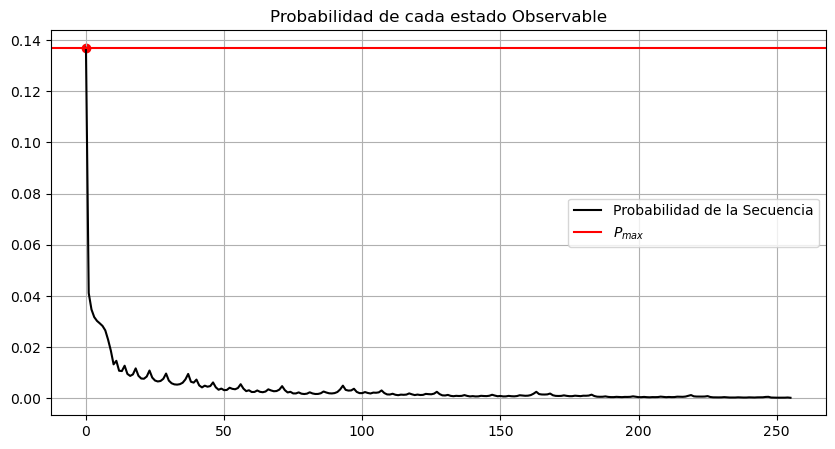

In [42]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()
ax.plot(PObs,color='k',label="Probabilidad de la Secuencia")
ax.axhline(y=pMax_o,color="r",label="$P_{max}$")
ax.scatter(iMax_o,pMax_o,color="r")
ax.grid(axis='both')
ax.legend()
plt.title("Probabilidad de cada estado Observable")

In [17]:
np.sum(PObs)

1.0000000000000007

El resultado se encuentra ligado a la probabilidad a priori, ya que esta constituye la herramienta inicial que condiciona la interacción entre el estado observado y las matrices de transición y emisión. Por ende, dicha probabilidad preestablecida influye en las posibilidades calculadas. De manera similar, al tratarse de una cadena de Markov, la cual es un proceso estocástico, se establece que la probabilidad asociada a cada estado depende únicamente del estado inmediatamente anterior:
$$\mathbb{P}(X_0=x_0,X_1=x_1,X_{n+1}=x_{n+1})=\mathbb{P}(X_0=x_0)\mathbb{P}(X_1=x_1)\mathbb{P}(X_{n+1}=x_{n+1})$$